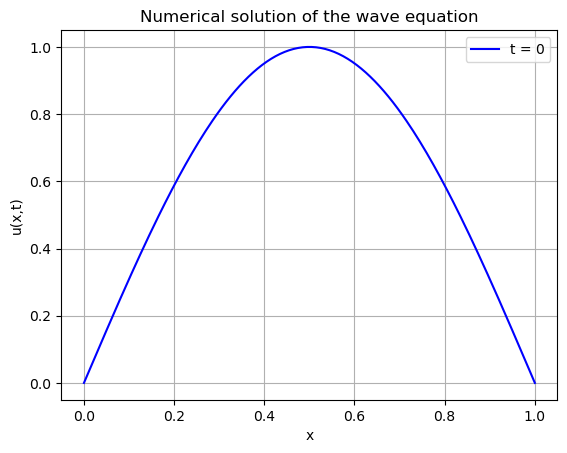

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter problem
c = 1.0   # Kecepatan gelombang
L = 1.0   # Panjang domain
T = 2.0   # Waktu simulasi

# Parameter grid
dt = 0.01  # Delta x
dx = 0.005  # Delta t

# Kondisi stabilitas
r = c * dt / dx  # Courant number (stabil jika r <= 1)

# Set up grid
Nx = int(L / dx) + 1  # Jumlah titik di grid ruang
Nt = int(T / dt)      # Jumlah langkah waktu
x = np.linspace(0, L, Nx)  # Membuat grid di ruang x

# Kondisi awal u(x,0) = sin(πx) dan u_t(x,0) = 0 (kecepatan awal)
u = np.sin(np.pi * x)  # Kondisi awal perpindahan
u_prev = np.copy(u)    # Untuk t = -1 (sebelumnya)
u_new = np.zeros(Nx)   # Array untuk menyimpan nilai baru u

# Syarat batas u(0,t) = u(L,t) = 0 (ujung tetap)
u[0] = u[-1] = 0
u_prev[0] = u_prev[-1] = 0

# Plot kondisi awal
plt.plot(x, u, label='t = 0', color='blue')

# Time-stepping loop
for n in range(1, Nt):
    # Menghitung nilai u pada t+dt menggunakan formula beda hingga
    for i in range(1, Nx-1):
        u_new[i] = 2 * u[i] - u_prev[i] + r**2 * (u[i+1] - 2*u[i] + u[i-1])
    
    # Update untuk langkah waktu berikutnya
    u_prev = np.copy(u)  # u(t) menjadi u(t-dt)
    u = np.copy(u_new)   # u_new menjadi u(t)

    # Plot pada interval waktu tertentu
    if n % 200 == 0:  # Plot tiap 200 iterasi
        plt.plot(x, u, label=f't = {n*dt:.2f}')

# Menampilkan hasil
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Numerical solution of the wave equation')
plt.legend()
plt.grid(True)
plt.show()


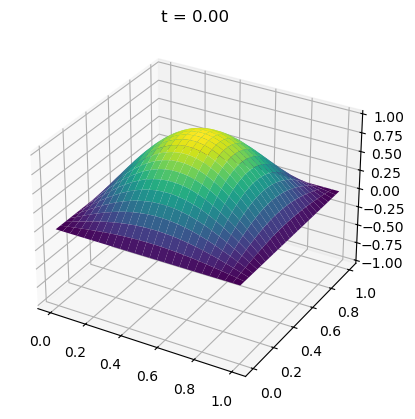

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter problem
c = 1.0    # Kecepatan gelombang
Lx, Ly = 1.0, 1.0  # Panjang domain dalam x dan y
T = 1.0    # Waktu simulasi

# Parameter grid
dx = dy = 0.02  # Delta x dan Delta y (sama untuk kesederhanaan)
dt = 0.01       # Delta t
Nx, Ny = int(Lx / dx) + 1, int(Ly / dy) + 1  # Jumlah titik di grid x dan y
Nt = int(T / dt)  # Jumlah langkah waktu

# Kondisi stabilitas
r = c * dt / dx  # Courant number (harus <= 1)

# Set up grid 3D
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Kondisi awal u(x, y, 0) = sin(πx) * sin(πy) dan u_t(x, y, 0) = 0
u = np.sin(np.pi * X) * np.sin(np.pi * Y)  # Kondisi awal perpindahan
u_prev = np.copy(u)  # Untuk t = -1 (sebelumnya)
u_new = np.zeros((Nx, Ny))  # Array untuk menyimpan nilai baru u

# Syarat batas u(0,t) = u(Lx,t) = u(Ly,t) = 0 (ujung tetap)
u[0, :], u[-1, :], u[:, 0], u[:, -1] = 0, 0, 0, 0
u_prev[0, :], u_prev[-1, :], u_prev[:, 0], u_prev[:, -1] = 0, 0, 0, 0

# Fungsi untuk melakukan update dan menghitung nilai u(t+dt)
def update_wave(u, u_prev, u_new, r, Nx, Ny):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_new[i, j] = 2 * u[i, j] - u_prev[i, j] + r**2 * (
                u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - 4 * u[i, j])
    return u_new

# Time-stepping loop
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for n in range(Nt):
    # Update gelombang untuk waktu berikutnya
    u_new = update_wave(u, u_prev, u_new, r, Nx, Ny)
    
    # Update nilai untuk iterasi berikutnya
    u_prev = np.copy(u)
    u = np.copy(u_new)

    # Visualisasi 3D pada interval waktu tertentu
    if n % 20 == 0:  # Tampilkan setiap 20 langkah waktu
        ax.clear()
        ax.plot_surface(X, Y, u, cmap='viridis')
        ax.set_zlim(-1, 1)
        ax.set_title(f't = {n*dt:.2f}')
        plt.pause(0.1)

plt.show()
